In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_normalised.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_normalised.csv')

In [ ]:
X_train = df_train.drop("is_canceled", axis = 1)
y_train = df_train["is_canceled"]

X_test = df_test.drop("is_canceled", axis = 1)
y_test = df_test["is_canceled"]

In [ ]:
df_train_1H = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_onehot.csv')
df_test_1H = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_onehot.csv')

In [ ]:
X_train_1H = df_train_1H.drop("is_canceled", axis = 1)
y_train_1H = df_train_1H["is_canceled"]

X_test_1H = df_test_1H.drop("is_canceled", axis = 1)
y_test_1H = df_test_1H["is_canceled"]

In [ ]:
df_train_1H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81957 entries, 0 to 81956
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       81957 non-null  float64
 1   arrival_date_month              81957 non-null  int64  
 2   arrival_date_week_number        81957 non-null  int64  
 3   adults                          81957 non-null  float64
 4   is_repeated_guest               81957 non-null  int64  
 5   previous_cancellations          81957 non-null  float64
 6   previous_bookings_not_canceled  81957 non-null  float64
 7   booking_changes                 81957 non-null  float64
 8   days_in_waiting_list            81957 non-null  float64
 9   adr                             81957 non-null  float64
 10  required_car_parking_spaces     81957 non-null  float64
 11  total_of_special_requests       81957 non-null  float64
 12  num.guests                      

## Feature Importance Plots

### Feature Importance: Decision Tree

In [ ]:
model_DT = DecisionTreeClassifier(
    random_state = 42,
    min_samples_leaf= 9, 
    min_samples_split= 5, 
    max_depth= 17, 
    criterion= "gini")
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=9, min_samples_split=5,
                       random_state=42)

In [ ]:
importances = model_DT.feature_importances_

# Get the names of the features
feature_names = X_train.columns

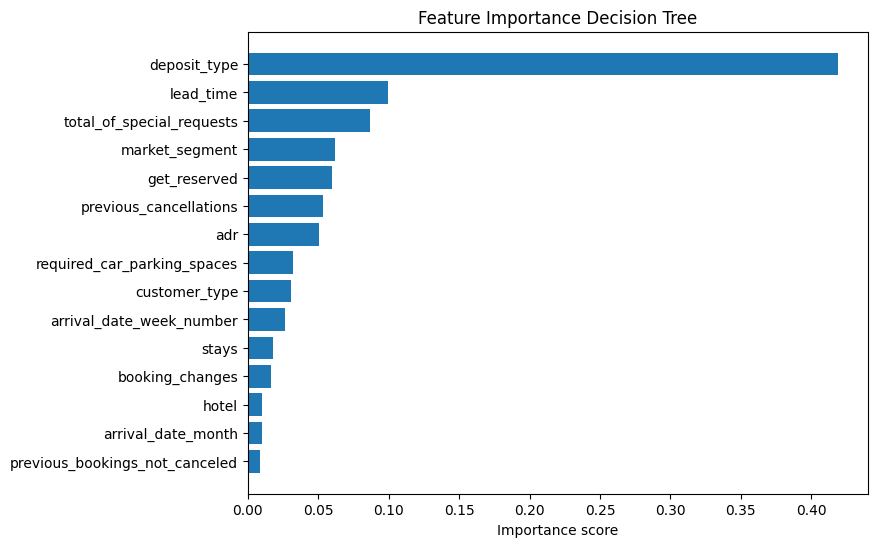

In [ ]:
# Plot the feature importance bar graph
fig, ax = plt.subplots(figsize=(8,6))

# Sort features by importance score
indices = np.argsort(importances)[::-1]
indices = indices[:15]  # Select top 10 features only

# Flip coordinates and plot bar chart
ax.barh(range(len(indices)), importances[indices])
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(np.array(feature_names)[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance score')
ax.set_title('Feature Importance Decision Tree')

plt.show()

### Feature Importance: Random Forest

#### We first use a impurity-based approach 

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 

In [ ]:
model_RF = RandomForestClassifier(random_state = 42,
                               n_estimators= 381, 
                               max_depth= 21, 
                               min_samples_split= 2, 
                               min_samples_leaf= 5)
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, min_samples_leaf=5, n_estimators=381,
                       random_state=42)

In [ ]:
importances = model_RF.feature_importances_

# Get the names of the features
feature_names = X_train.columns

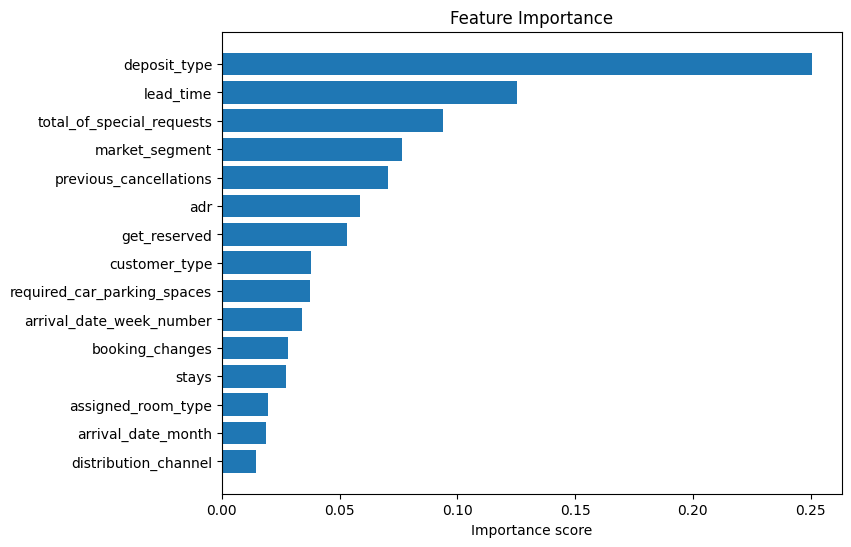

In [ ]:
# Plot the feature importance bar graph
fig, ax = plt.subplots(figsize=(8,6))

# Sort features by importance score
indices = np.argsort(importances)[::-1]
indices = indices[:15]  # Select top 10 features only

# Flip coordinates and plot bar chart
ax.barh(range(len(indices)), importances[indices])
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(np.array(feature_names)[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance score')
ax.set_title('Feature Importance')

plt.show()

#### We then try the permutation-based approach

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model_RF, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 326.440 seconds


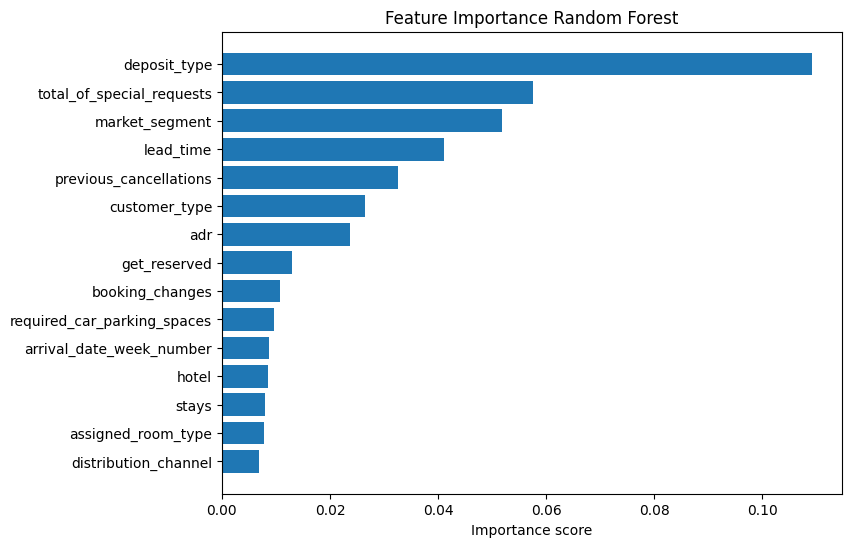

In [ ]:
# Plot the feature importance bar graph
fig, ax = plt.subplots(figsize=(8,6))

# Sort features by importance score
indices = np.argsort(forest_importances)[::-1]
indices = indices[:15]  # Select top 15 features only

# Flip coordinates and plot bar chart
ax.barh(range(len(indices)), forest_importances[indices])
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(np.array(feature_names)[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance score')
ax.set_title('Feature Importance Random Forest')

plt.show()

We observe that there are no significant difference between the two approximation methods.

### LightGBM: todo

In [ ]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier(
    random_state = 42,
    boosting_type= "gbdt", 
    n_estimators= 303, 
    learning_rate= 0.19095216992168662, 
    num_leaves= 1520, 
    max_depth= 8, 
    min_child_samples= 400,
    max_bin= 232, 
    reg_alpha= 2, 
    reg_lambda= 11, 
    min_split_gain= 0.014631453059384972, 
    subsample= 0.5, 
    colsample_bytree= 0.30000000000000004)
model_lgbm.fit(X_train, y_train,
          categorical_feature=[0, 2, 3, 5, 6, 7, 10, 11, 13, 15, 21, 22])

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(colsample_bytree=0.30000000000000004,
               learning_rate=0.19095216992168662, max_bin=232, max_depth=8,
               min_child_samples=400, min_split_gain=0.014631453059384972,
               n_estimators=303, num_leaves=1520, random_state=42, reg_alpha=2,
               reg_lambda=11, subsample=0.5)

In [ ]:
# Extract the feature importance information from the trained model
importance = model_lgbm.feature_importances_

# Sort the feature importance values in descending order
sorted_idx = importance.argsort()[::-1]

# Select the top 15 features based on their importance values
top15 = sorted_idx[:15]

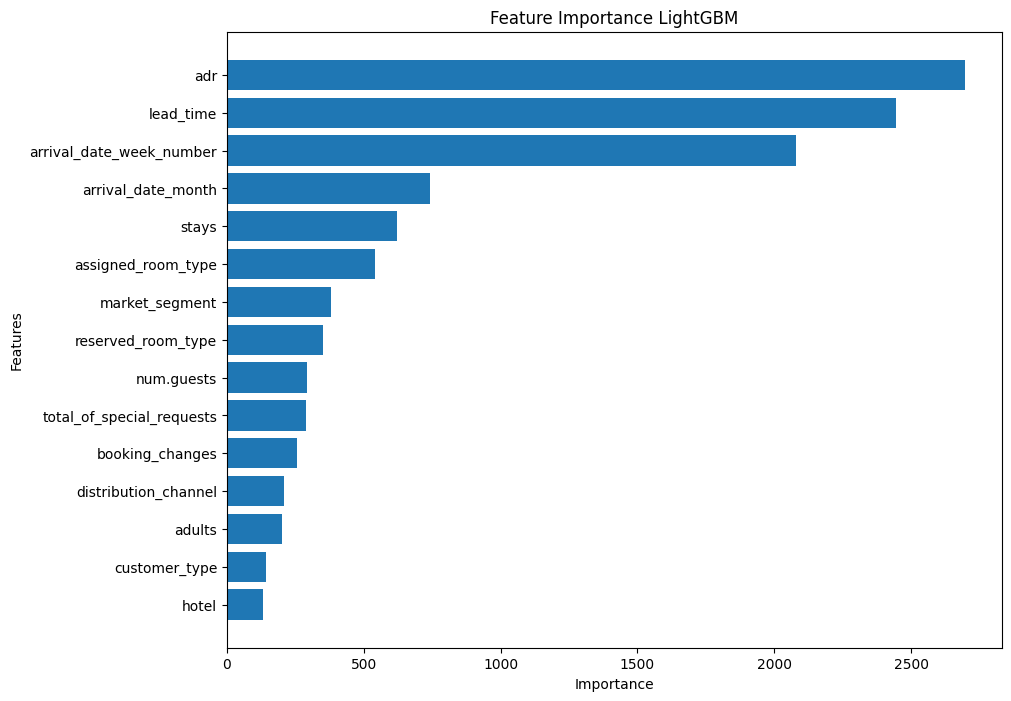

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(top15)), importance[top15])
plt.yticks(range(len(top15)), X_train.columns[top15])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importance LightGBM')
plt.gca().invert_yaxis()
plt.show()

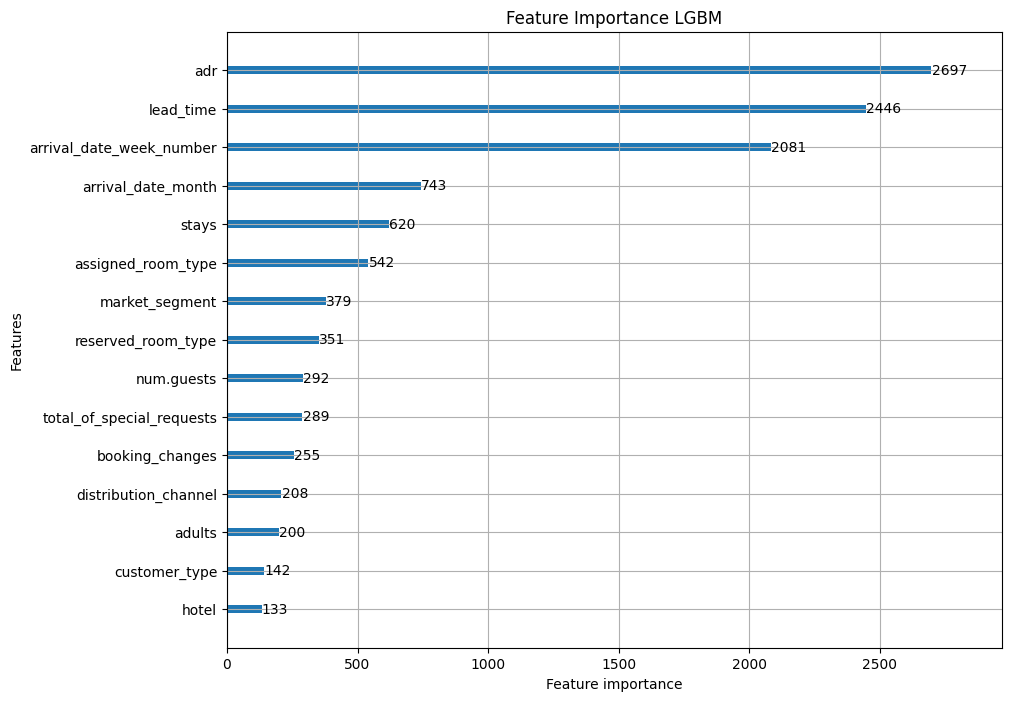

In [ ]:
# assume 'model' is a trained LightGBM model
lgb.plot_importance(model_lgbm, max_num_features=15, figsize=(10,8))
plt.title('Feature Importance LGBM')
plt.show()


### XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

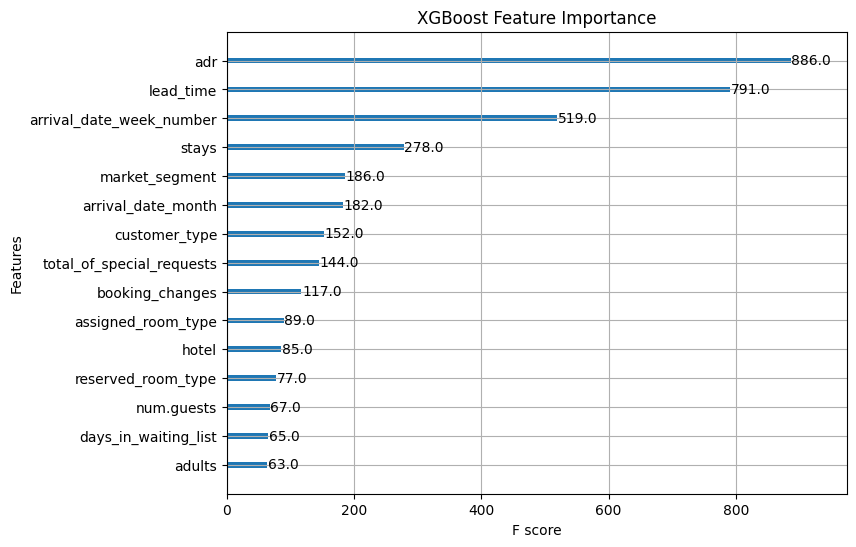

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
xgb.plot_importance(model_xgb, max_num_features=15, ax=ax)
plt.title('XGBoost Feature Importance')
plt.show()

## Shapley Values

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Shapley value is extremely costly to run. Let us use a small set.
sample_X = X_test_1H.sample(n=200, random_state=42)

In [ ]:
sample_X

,lead_time,arrival_date_month,arrival_date_week_number,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,...,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,hotel_City Hotel,hotel_Resort Hotel
26527,0.539335,7,27,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,0.269258,...,0,1,0,0,0,0,1,0,1,0
16429,-0.900842,6,26,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,1.231050,...,0,1,0,0,0,0,0,1,0,1
5707,1.343590,10,43,-1.789655,0,-0.102601,-0.086744,-0.341585,0.997308,-0.487965,...,0,0,1,0,0,0,1,0,1,0
7937,-0.956953,2,7,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,-1.596489,...,0,1,0,0,0,0,1,0,0,1
6252,1.605441,11,47,0.288481,0,-0.102601,-0.086744,1.244387,-0.132459,-0.926234,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,-0.638992,7,30,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,1.423837,...,0,1,0,0,0,0,1,0,1,0
34964,-0.854083,3,14,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,-0.304389,...,0,1,0,0,0,0,1,0,1,0
2958,1.979513,9,38,0.288481,0,-0.102601,-0.086744,-0.341585,-0.132459,0.352799,...,0,0,1,0,0,0,1,0,1,0
396,-0.938249,11,46,-1.789655,0,-0.102601,-0.086744,-0.341585,-0.132459,-1.096100,...,0,1,0,0,0,0,1,0,0,1


### RF

In [ ]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(X_train_1H, y_train_1H)

RandomForestClassifier(random_state=42)

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(model_RF.predict, sample_X)
sv = explainer(sample_X)

Permutation explainer: 201it [01:24,  2.15it/s]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


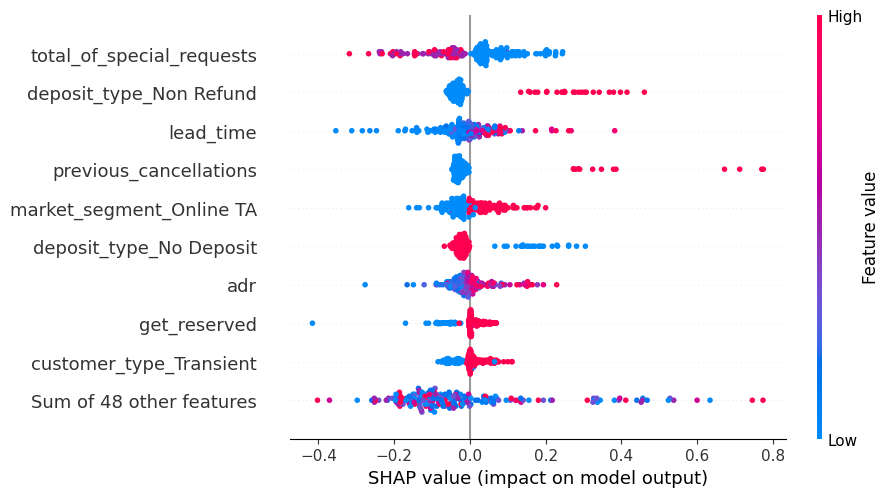

In [ ]:
shap.plots.beeswarm(sv)

### XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state = 42)
model_xgb.fit(X_train_1H, y_train_1H)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(model_xgb.predict, sample_X)
sv = explainer(sample_X)

Permutation explainer: 201it [00:14,  3.55it/s]


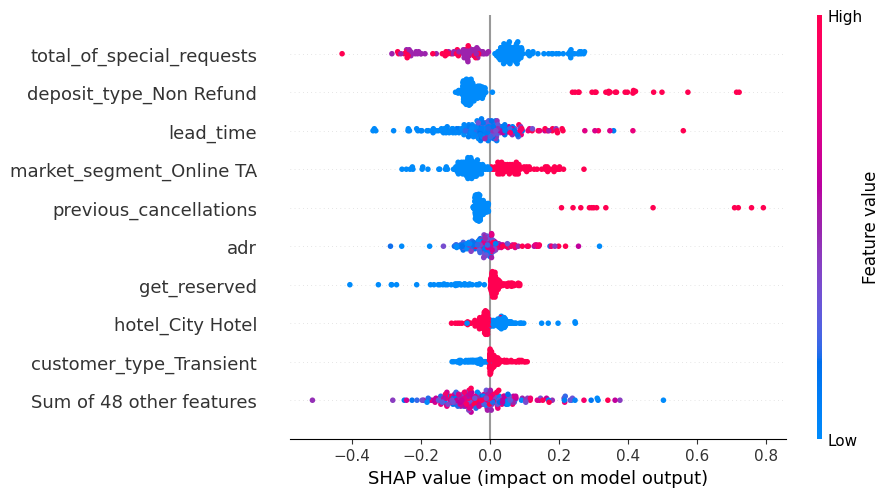

In [ ]:
shap.plots.beeswarm(sv)